In [2]:
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
data = xr.DataArray(np.random.rand(2, 3), dims=['x', 'y'], coords={ 'x': [10, 20] })
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.44705813, 0.84393367, 0.44736896],
       [0.12538903, 0.54608328, 0.706658  ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [4]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [5]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [6]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Indexing

Xarray provides 4 ways of indexing:
- Label based indexing along the provided dimension
- Slice indexing
- `loc[...]/iloc[...]` indexing
- `sel(<dim_name>=...)/isel(<dim_name>=...)`

Note that, if we have a dimension called `x`, the difference between `sel` and `isel` is the following:
- `sel` is meant to be used specifying a coordinate name, for example if we have 2 coordinate for the `x` dimension, `(10,20)`, using `sel` we must specify `10` or `20`, the coorindates name &rarr; `da.sel(x=10)`.
- `isel` does not consider coordinates labels, but the integer based index of the "array" of coordinates, so if we want to replicate the same example as above, we should have written `ds.isel(x=0)`.

In [7]:
data.loc[10] # indexing by coordinates name

<xarray.DataArray (y: 3)>
array([0.44705813, 0.84393367, 0.44736896])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [8]:
data.isel(y=0) # integere select: by dimension name and INTEGERER

<xarray.DataArray (x: 2)>
array([0.44705813, 0.12538903])
Coordinates:
  * x        (x) int64 10 20

In [9]:
data.sel(x=10) # Select, by dimension name and LABEL

<xarray.DataArray (y: 3)>
array([0.44705813, 0.84393367, 0.44736896])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [10]:
attrs = {
    "long_name": "random_velocity",
    "untis": "metres/sec",
    "description": "A random variaible",
    "random_attr": 123
}

data.attrs = attrs
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.44705813, 0.84393367, 0.44736896],
       [0.12538903, 0.54608328, 0.706658  ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

## Computation

In [11]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.44705813, 10.84393367, 10.44736896],
       [10.12538903, 10.54608328, 10.706658  ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [12]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[0.43231466, 0.74726293, 0.43259492],
       [0.12506071, 0.51934413, 0.64929569]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [13]:
data.sum()

<xarray.DataArray ()>
array(3.11649106)

In [14]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
a

<xarray.DataArray (y: 3)>
array([-1.32588508,  0.55593658, -0.05773384])
Coordinates:
  * y        (y) int64 0 1 2

In [15]:

b = xr.DataArray(np.random.randn(4), dims="z")
b

<xarray.DataArray (z: 4)>
array([ 0.73975692, -0.16495076,  0.88204005, -0.47431027])
Dimensions without coordinates: z

In [16]:
c = a + b
c

<xarray.DataArray (y: 3, z: 4)>
array([[-0.58612816, -1.49083584, -0.44384503, -1.80019535],
       [ 1.2956935 ,  0.39098582,  1.43797663,  0.08162631],
       [ 0.68202308, -0.2226846 ,  0.82430621, -0.53204411]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

In [17]:
np.random.randn(3)[:, np.newaxis] + np.random.randn(2)[np.newaxis, :]

array([[ 1.27712619, -0.64762223],
       [ 0.816005  , -1.10874342],
       [ 0.3540402 , -1.57070821]])

## Group By

In [18]:
labels = xr.DataArray(["E", "F", "E"], dims="y", name="labels")
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, labels: 2)>
array([[0.44721354, 0.84393367],
       [0.41602351, 0.54608328]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [19]:
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[0.3216691 , 0.29785038, 0.32197993],
       [0.        , 0.        , 0.58126897]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

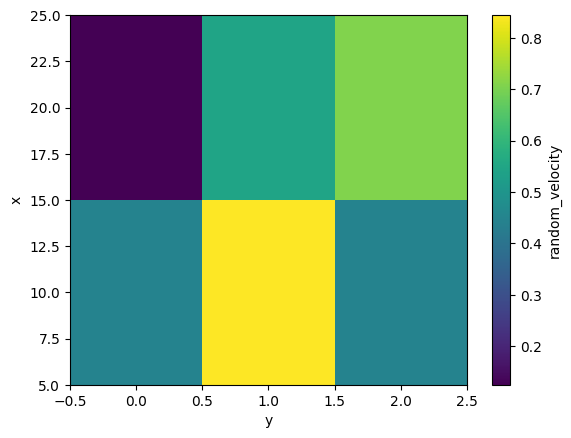

In [20]:
data.plot()

In [21]:
data.groupby(labels).sum().to_series()

x   labels
10  E         0.894427
    F         0.843934
20  E         0.832047
    F         0.546083
dtype: float64

# Datasets

In [22]:
ds = xr.Dataset({
    "foo": data,
    "bar": ("x", [1, 2]), # sharing x coord with above data
    "baz": np.pi,
})
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.4471 0.8439 0.4474 0.1254 0.5461 0.7067
    bar      (x) int64 1 2
    baz      float64 3.142

In [23]:
ds['bar'].sel(x=20)

<xarray.DataArray 'bar' ()>
array(2)
Coordinates:
    x        int64 20

## DataArray

In [24]:
# creating a data array in it's complete form
data = np.random.randn(4, 3)

locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)

# only data is required, all of the other argumenst, if not provided, will be 
# filled with default values
arr = xr.DataArray(data, coords=[times, locs], dims=["time", "space"], name="foo")

# akshually, only dimensions have default values, coordinates does not.
# != from pandas that always auto index data
arr

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

Coordinates can be specified in the following ways:
- A **list of values** with lenght wqual to the number fo dimnesion, providing coordinate labels for each dimension. Each value must be of one of the following:
  - A `DataArray` or `Variabile` class members
  - A tuple of the form `(dims, data[, attrs])` wich is converted into arguments for `Variable`
  - A *pandas* object or scalar value.
  - A 1D array or list, which is interpreted as values for a one dimensional cooridnate variable along the same dimension as it's name.
- A **dictionary** of `{coord_name: coord}` where values are of the same form as the list. Supplying coordinates as a dict allows other coordinates than those corresponding to dimensions. If you supply `coords` as a dict, you MUST provide `dims`.

In [25]:
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [26]:
xr.DataArray(
    data,
    coords={
    "time": times,
    "space": locs,
    "const": 42,
    "ranking": ("space", [1, 2, 3]),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

In [27]:
# Dictionary with coords across multiple dimensions
xr.DataArray(
    data,
    coords={
        "time":times,
        "space": locs,
        "const": 42,
        "rankin": (("time", "space"), np.arange(12).reshape(4, 3)),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    rankin   (time, space) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [28]:
# Constructor by pandas Data Structure
df = pd.DataFrame({ "x": [0, 1], "y": [2, 3]}, index=["a", "b"])
df.index.name = "abc"
df.columns.name = "xyz"
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [29]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

In [30]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.4471 0.8439 0.4474 0.1254 0.5461 0.7067
    bar      (x) int64 1 2
    baz      float64 3.142

In [31]:
arr.values = 1.0 * arr.values

## DataSet

In addition to the dict-like interface of the dataset itself (which can be used to access any valiable in a dataset)
datasets have four key properties:
- `dims`: dictionary mapping from dim names to the fixed legth of dimensions.
- `data_vars`: dict-like container of DataArrays corresponding to variabels.
- `coords`: container of DAtaArrays intended to label points used in `data_vars`
- `attrs`: this holds aribitrary metadata.

In [32]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.randn(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, 99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

In [33]:
ds = xr.Dataset(
    {
        # Data Variables as (coords, data)
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    }
)

ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation   (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033

In [36]:
ds["temperature"] # extrating temperature DataArray

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[22.22303757,  2.00689368, 25.59220261],
        [11.80115491, 21.87754908, -2.08000517]],

       [[11.76366836, 23.30955341, 21.40812276],
        [20.56627918, 24.50402596,  6.68223065]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [44]:
print(ds.coords)
print("------------------------------------------------")
print(ds.data_vars)

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
------------------------------------------------
Data variables:
    temperature    (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation  (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033


In [48]:
ds.drop_vars("temperature")

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation   (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033

Dropping a dimension will drop each variable that is using that dimension!

In [50]:
ds.drop_dims('time')

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

It's possible to create pipelines of transofrmations with the `pipe(func)` method

In [53]:
import matplotlib.pyplot as plt

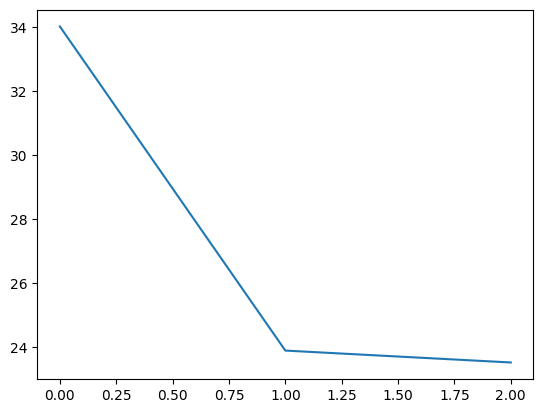

In [56]:
(ds.temperature.sel(x=0).pipe(lambda x: x * 2).mean("y").pipe(plt.plot))

## Coordindates

Coordinates can be divided into two set:
- **Dimension Coordinates**: one dimensional coordinates with a name equal to their one and only one associated dimension (marked with `*`)
  - Used for label based indexing and alingnement (like pandas `Index` object).
- **Non-Dimension Coordinate**: variables that contains coordinate data, but are not a dimension coordinate:
  - They can be multidimensional.
  - No reletionship betwee the name of the non dimension coordinate name(s) and the dimension(s).
  - They can be useful for indexing and plotting.
  - Xarray does not make direct use of them (during alignement or automatic indexing).

In [58]:
ds.coords

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

Converting back and forth between data and coordinates

In [59]:
ds.reset_coords() # make each non dimension coordinate a data variable

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation   (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    reference_time  datetime64[ns] 2014-09-05

In [60]:
ds.set_coords(["temperature", "precipitation"])

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    temperature     (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation   (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [61]:
ds['temperature'].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[22.22303757,  2.00689368, 25.59220261],
        [11.80115491, 21.87754908, -2.08000517]],

       [[11.76366836, 23.30955341, 21.40812276],
        [20.56627918, 24.50402596,  6.68223065]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

In [62]:
ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation   (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033

Some useful coordinates method

In [63]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [66]:
alt = xr.Dataset(coords={"z": [10], "lat": 0, "lon": 0})
ds.coords.merge(alt.coords).coords

Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
  * z               (z) int64 10

In [70]:
ds['time'].to_index() # To pandas Index

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [76]:
ds.indexes # dict-like object storing key=dim_name and value=Index

Indexes:
    time     DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

### Working with multiindex coordinates

In [79]:
midx = pd.MultiIndex.from_arrays(
    [["R", "R", "V", "V"], [0.1, 0.2, 0.7, 0.9]], names=("band", "wn")
)

mda = xr.DataArray(np.random.rand(4), coords={"spec": midx}, dims="spec")
mda

<xarray.DataArray (spec: 4)>
array([0.24982081, 0.59045359, 0.87985907, 0.76987387])
Coordinates:
  * spec     (spec) object MultiIndex
  * band     (spec) object 'R' 'R' 'V' 'V'
  * wn       (spec) float64 0.1 0.2 0.7 0.9

In [82]:
print(mda.band)
print("------------------------------------------------------------------------------------------")
print(mda.wn)

<xarray.DataArray 'band' (spec: 4)>
array(['R', 'R', 'V', 'V'], dtype=object)
Coordinates:
  * spec     (spec) object MultiIndex
  * band     (spec) object 'R' 'R' 'V' 'V'
  * wn       (spec) float64 0.1 0.2 0.7 0.9
------------------------------------------------------------------------------------------
<xarray.DataArray 'wn' (spec: 4)>
array([0.1, 0.2, 0.7, 0.9])
Coordinates:
  * spec     (spec) object MultiIndex
  * band     (spec) object 'R' 'R' 'V' 'V'
  * wn       (spec) float64 0.1 0.2 0.7 0.9


In [85]:
mda.to_pandas() # as a pandas Series

band  wn 
R     0.1    0.249821
      0.2    0.590454
V     0.7    0.879859
      0.9    0.769874
dtype: float64

**Indexing**: every selector allowed in pandas, is allowed in Xarray,
therefore, you can slice a multi index by provind multiple *indexers*
i.e. a tuple of slices, labels, list of labels, ...

In [89]:
# creating and index from the cartesian product of "abc" X [0, 1] => a,0 ; a,1 ; b,0 ; b1 ; ...
midx = pd.MultiIndex.from_product([list("abc"), [0, 1]], names=("one", "two"))
mda = xr.DataArray(np.random.rand(6, 3), [("x", midx), ("y", range(3))])
mda

<xarray.DataArray (x: 6, y: 3)>
array([[0.66201316, 0.3481229 , 0.02441334],
       [0.69111981, 0.43532146, 0.64002271],
       [0.92204207, 0.63497679, 0.50964764],
       [0.24052793, 0.38020317, 0.20979329],
       [0.17667372, 0.91725194, 0.92560044],
       [0.06254172, 0.94245856, 0.9360698 ]])
Coordinates:
  * x        (x) object MultiIndex
  * one      (x) object 'a' 'a' 'b' 'b' 'c' 'c'
  * two      (x) int64 0 1 0 1 0 1
  * y        (y) int64 0 1 2

In [102]:
"""
Selecting values of each coordinate along "x" dimension
that match the filter: coord == ("a" || "b") && 0
"""
mda.sel(x=(list("ab"), [0]))

<xarray.DataArray (x: 2, y: 3)>
array([[0.66201316, 0.3481229 , 0.02441334],
       [0.92204207, 0.63497679, 0.50964764]])
Coordinates:
  * x        (x) object MultiIndex
  * one      (x) object 'a' 'b'
  * two      (x) int64 0 0
  * y        (y) int64 0 1 2

In [107]:
# Xarray adds indexing through dictionaries
mda.sel(x={"one": "a", "two": 0})

<xarray.DataArray (y: 3)>
array([0.66201316, 0.3481229 , 0.02441334])
Coordinates:
    x        object ('a', 0)
    one      <U1 'a'
    two      int64 0
  * y        (y) int64 0 1 2

In [108]:
# selecting elements with a list/tuples of labels, or a slice of tuples
mda.sel(x=[("a", 0), ("b", 1)])

<xarray.DataArray (x: 2, y: 3)>
array([[0.66201316, 0.3481229 , 0.02441334],
       [0.24052793, 0.38020317, 0.20979329]])
Coordinates:
  * x        (x) object MultiIndex
  * one      (x) object 'a' 'b'
  * two      (x) int64 0 1
  * y        (y) int64 0 1 2

In [111]:
# at last, `sel` accept multi index levels directly as a keyword argument
mda.sel(one="a", two=0)

<xarray.DataArray (y: 3)>
array([0.66201316, 0.3481229 , 0.02441334])
Coordinates:
    x        object ('a', 0)
    one      <U1 'a'
    two      int64 0
  * y        (y) int64 0 1 2

In [128]:
# same as
mda.loc[{"one": "a", "two": 0}]
#or
mda.loc[("a", 0), ...]

<xarray.DataArray (y: 3)>
array([0.66201316, 0.3481229 , 0.02441334])
Coordinates:
    x        object ('a', 0)
    one      <U1 'a'
    two      int64 0
  * y        (y) int64 0 1 2

Note: the ellipsis operator in the `loc` specifier is mandatory because
unlike pandas, xarray does not guess whether you provide index levels or 
dimensions  when using loc in some ambiguous cases.

## Indexing in Depth

Xarray's indexing strategies can be summerized in this table:

| Dimension Lookup | Index Lookup | `DataArray` syntax | `Dataset` syntax |
|------------------|--------------|--------------------|------------------|
| Positional       | By integer   | `da[:, 0]`         | *not available*  |
| Positional       | By  label    | `da.loc[:, 'IA]`   | *not available*  |
| By name          | By integer   | `da.isel(space=0)` or `da[dict(space=0)]`         | `ds.isel(space=0)` or `ds[dict(space=0)]`  |
| By name          | By  label    | `da.sel(space='IA')` or `da.loc[dict(space='IA')]`         | `ds.sel(space='IA')` or `ds.loc[dict(space='IA')]`  |

It's also possible to index by supplying `DataArray` object as indexer

### Positional Indexing

Mostly just like numpy arrays and pandas `loc` indexing

In [138]:
da = xr.DataArray(
    np.random.rand(4, 3),
    {
        "time": pd.date_range("2023-04-12", periods=4),
        "space": ["IA", "IL", "IN"],
    }
)

da[: 2]

<xarray.DataArray (time: 2, space: 3)>
array([[0.18429844, 0.81175393, 0.16213152],
       [0.65123919, 0.98516509, 0.04608972]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
  * space    (space) <U2 'IA' 'IL' 'IN'

In [139]:
da[0, 0]

<xarray.DataArray ()>
array(0.18429844)
Coordinates:
    time     datetime64[ns] 2023-04-12
    space    <U2 'IA'

In [140]:
da[:, [1, 2]] # selecting all rows ("time" dim), and 2nd and 3rd col ("IL", "IN")

<xarray.DataArray (time: 4, space: 2)>
array([[0.81175393, 0.16213152],
       [0.98516509, 0.04608972],
       [0.12080192, 0.97061269],
       [0.70292801, 0.54948904]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IL' 'IN'

In [142]:
da.loc["2023-04-12": "2023-04-14", "IA"]

<xarray.DataArray (time: 3)>
array([0.18429844, 0.65123919, 0.69174262])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
    space    <U2 'IA'

Just like pandas, you can set values using this notation

In [143]:
da.loc["2023-04-12", ["IL", "IN"]] = -10
da

<xarray.DataArray (time: 4, space: 3)>
array([[  0.18429844, -10.        , -10.        ],
       [  0.65123919,   0.98516509,   0.04608972],
       [  0.69174262,   0.12080192,   0.97061269],
       [  0.48190459,   0.70292801,   0.54948904]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IL' 'IN'

### Indexing with Dimension name

Two ways to do this:
1. `sel()` and `isel()`

In [153]:
da.isel(space=0, time=slice(None, 2)) #  same as: `da[0:2, 0]`

<xarray.DataArray (time: 2)>
array([0.18429844, 0.65123919])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
    space    <U2 'IA'

In [155]:
da.sel(time=slice("2023-04-12", "2023-04-14"))

<xarray.DataArray (time: 3, space: 3)>
array([[  0.18429844, -10.        , -10.        ],
       [  0.65123919,   0.98516509,   0.04608972],
       [  0.69174262,   0.12080192,   0.97061269]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
  * space    (space) <U2 'IA' 'IL' 'IN'

2. Use a dictionary as the argument for *array positional* or *label based* array indexing

In [154]:
da[{"space": 0, "time": slice(None, 2)}] # or da[dict(space=0, time=slice(None, 2))]

<xarray.DataArray (time: 2)>
array([0.18429844, 0.65123919])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
    space    <U2 'IA'

In [156]:
# index by dimension coordinate labels
da.loc[dict(time=slice("2023-04-12", "2023-04-14"))]

<xarray.DataArray (time: 3, space: 3)>
array([[  0.18429844, -10.        , -10.        ],
       [  0.65123919,   0.98516509,   0.04608972],
       [  0.69174262,   0.12080192,   0.97061269]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
  * space    (space) <U2 'IA' 'IL' 'IN'

### Dataset Indexing

In [159]:
ds = da.to_dataset(name="foo")

ds

<xarray.Dataset>
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    foo      (time, space) float64 0.1843 -10.0 -10.0 ... 0.4819 0.7029 0.5495

In [171]:
ds.isel(space=0, time=0)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     datetime64[ns] 2023-04-12
    space    <U2 'IA'
Data variables:
    foo      float64 0.1843

In [172]:
ds.sel(time="2023-04-12")

<xarray.Dataset>
Dimensions:  (space: 3)
Coordinates:
    time     datetime64[ns] 2023-04-12
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    foo      (space) float64 0.1843 -10.0 -10.0

In [176]:
# ds[0, 0] KeyErro!
# positional indexing is somehow ambiguous in Xarray.
# You can make it work with dimension names
ds[{"space": [0], "time": [0]}]

<xarray.Dataset>
Dimensions:  (time: 1, space: 1)
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12
  * space    (space) <U2 'IA'
Data variables:
    foo      (time, space) float64 0.1843

In [179]:
# same thing applies to loc
ds.loc[dict(space=["IA", "IN"])]

<xarray.Dataset>
Dimensions:  (time: 4, space: 2)
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IN'
Data variables:
    foo      (time, space) float64 0.1843 -10.0 0.6512 ... 0.9706 0.4819 0.5495

### `where` masking

The selection operation returns an object with the same shape but with the elements maked by the predicate inside `where` with `nan`

In [183]:
da = xr.DataArray(np.arange(16).reshape(4, 4), dims=["x", "y"])
da.where(da.x + da.y < 4)

<xarray.DataArray (x: 4, y: 4)>
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6., nan],
       [ 8.,  9., nan, nan],
       [12., nan, nan, nan]])
Dimensions without coordinates: x, y

In [184]:
# if you don't want the data to be the same size of the oringinal one
da.where(da.y < 2, drop=True)

<xarray.DataArray (x: 4, y: 2)>
array([[ 0.,  1.],
       [ 4.,  5.],
       [ 8.,  9.],
       [12., 13.]])
Dimensions without coordinates: x, y

It's possible to select elements with the `isnin()` method, that works particurarly well with the `where` method.

Side Note: this can be sometimes significantly slower than `sel`

In [188]:
da = xr.DataArray([1, 2, 3, 4, 5], dims=["x"])
lookup = da * -1

da.where(lookup.isin([-2, -4]), drop=True)

<xarray.DataArray (x: 2)>
array([2., 4.])
Dimensions without coordinates: x

## Vectorized Indexing

In other terms, indexing many array elements at once in a *vectorized manner*

In [189]:
da = xr.DataArray(
    np.arange(12).reshape((3, 4)),
    dims=["x", "y"],
    coords={"x": [0, 1, 2], "y": ["a", "b", "c", "d"]},
)

da

<xarray.DataArray (x: 3, y: 4)>
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) <U1 'a' 'b' 'c' 'd'

In [190]:
da[[0, 2, 2], [1, 3]]

<xarray.DataArray (x: 3, y: 2)>
array([[ 1,  3],
       [ 9, 11],
       [ 9, 11]])
Coordinates:
  * x        (x) int64 0 2 2
  * y        (y) <U1 'b' 'd'

For more flexibility, you can provide a `DataArray` for vectorized indexing

In [192]:
idx_x = xr.DataArray([0, 1], dims=["x"])
idx_y = xr.DataArray([0, 1], dims=["y"])

da[idx_x, idx_y] # orthogonal indexing

<xarray.DataArray (x: 2, y: 2)>
array([[0, 1],
       [4, 5]])
Coordinates:
  * x        (x) int64 0 1
  * y        (y) <U1 'a' 'b'

In [193]:
da[idx_x, idx_x] # vectorized indexing

<xarray.DataArray (x: 2)>
array([0, 5])
Coordinates:
  * x        (x) int64 0 1
    y        (x) <U1 'a' 'b'

In [194]:
# mutlidimensional indexes
idx = xr.DataArray([[0, 1], [1, 0]], dims=["a", "b"])
da[idx]

<xarray.DataArray (a: 2, b: 2, y: 4)>
array([[[0, 1, 2, 3],
        [4, 5, 6, 7]],

       [[4, 5, 6, 7],
        [0, 1, 2, 3]]])
Coordinates:
    x        (a, b) int64 0 1 1 0
  * y        (y) <U1 'a' 'b' 'c' 'd'
Dimensions without coordinates: a, b

In [200]:
da[:, idx] # same as `da.sel(y=idx)`

<xarray.DataArray (x: 3, a: 2, b: 2)>
array([[[0, 1],
        [1, 0]],

       [[4, 5],
        [5, 4]],

       [[8, 9],
        [9, 8]]])
Coordinates:
  * x        (x) int64 0 1 2
    y        (a, b) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: a, b

In [202]:
ds = da.to_dataset(name="baz")
# ds.isel(x=xr.DataArray([0, 1, 2], dims=["points"]))
ds


<xarray.Dataset>
Dimensions:  (x: 3, y: 4)
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) <U1 'a' 'b' 'c' 'd'
Data variables:
    baz      (x, y) int64 0 1 2 3 4 5 6 7 8 9 10 11

### Assigning values with indexing

In [204]:
ds = xr.tutorial.open_dataset("air_temperature")

In [208]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [222]:
ds["empty"] = xr.full_like(ds["air"].mean("time"), fill_value=0)
# modify one grid point using `loc``
ds['empty'].loc[dict(lon=260, lat=30)] = 100

# modify a 2D region using `loc`
lc = ds.coords['lon'] ; la = ds.coords['lat']

ds['empty'].loc[
    dict(
    lon=lc[(lc > 220) & (lc < 260)],
    lat=la[(la > 20) & (la < 60)])
    ] = 100

We can also use `where`

In [224]:
# one grid point
ds["empty"] = xr.where(
    (ds.coords["lat"] == 20) & (ds.coords['lon'] == 260), 100, ds['empty']
)

# modify a 2D region

mask = (
    (ds.coords["lat"] < 20)
    & (ds.coords['lat'] < 60)
    & (ds.coords['lon'] < 220)
    & (ds.coords['lon'] < 260)
)

ds['empty'] = xr.where(mask, 100, ds['empty'])

A more advanced indexing can be possiible as follows

In [225]:
da = xr.DataArray(np.arange(56).reshape((7, 8)), dims=["x", "y"])
da

<xarray.DataArray (x: 7, y: 8)>
array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])
Dimensions without coordinates: x, y

In [226]:
# selecting (ix, iy) = ((0, 0), (1, 1), (6, 0))
# and mapping the values along a new dimension
# without coordinates named "z".
da.isel(
    x=xr.DataArray([0, 1, 6], dims="z"),
    y=xr.DataArray([0, 1, 0], dims="z"))

<xarray.DataArray (z: 3)>
array([ 0,  9, 48])
Dimensions without coordinates: z

In [230]:
# you can add coordinates to te new dimension like supplying a coordinate
# in one of the two DataArray
da.isel(
    x=xr.DataArray([0, 1, 6], dims="z", coords={"z": ["a", "b", "c"]}),
    y=xr.DataArray([0, 1, 0], dims="z"))

<xarray.DataArray (z: 3)>
array([ 0,  9, 48])
Coordinates:
  * z        (z) <U1 'a' 'b' 'c'

In [231]:
# The same applies to label based pointwise indexing with `sel`
da = xr.DataArray(
    np.random.rand(4, 3),
    {
        "time": pd.date_range("2023-04-12", periods=4),
        "space": ["IA", "IL", "IN"],
    },
)

times = xr.DataArray(
    pd.to_datetime(["2023-04-12", "2023-04-13", "2023-04-14"]),
    dims=["new_time"]
)

da.sel(space=xr.DataArray(["IA", "IL", "IN"], dims=["new_time"]), time=times)

<xarray.DataArray (new_time: 3)>
array([0.92796519, 0.55743971, 0.88874112])
Coordinates:
    time      (new_time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14
    space     (new_time) <U2 'IA' 'IL' 'IN'
  * new_time  (new_time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14

## Alignement and Reindexing

`reindex`, `reindex_like` and `align` impose a `DataArray` or `Dataset` onto a new set of coordinates corresponding to dimensions.

All values corresponding to new labels not found in the original object are filled with `nan`

In [232]:
# reindexing a particolar dimension
da.reindex(space=["IA", "CA"])

<xarray.DataArray (time: 4, space: 2)>
array([[0.92796519,        nan],
       [0.84006765,        nan],
       [0.54243971,        nan],
       [0.39247471,        nan]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'CA'

In [236]:
foo = da.rename("foo")
baz = (10 * da[:2, :2]).rename("baz")
baz

<xarray.DataArray 'baz' (time: 2, space: 2)>
array([[9.27965186, 5.80878798],
       [8.40067649, 5.57439715]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
  * space    (space) <U2 'IA' 'IL'

In [239]:
foo.reindex_like(baz)

<xarray.DataArray 'foo' (time: 2, space: 2)>
array([[0.92796519, 0.5808788 ],
       [0.84006765, 0.55743971]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13
  * space    (space) <U2 'IA' 'IL'

In [240]:
baz.reindex_like(foo) # as always, missing dimension values are filled with nan

<xarray.DataArray 'baz' (time: 4, space: 3)>
array([[9.27965186, 5.80878798,        nan],
       [8.40067649, 5.57439715,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]])
Coordinates:
  * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
  * space    (space) <U2 'IA' 'IL' 'IN'

The `align()` function let us perform flexible database-like `inner`, `outer`, `left` or `right` **joins**:

In [245]:
xr.align(foo, baz, join='inner')

(<xarray.DataArray 'foo' (time: 2, space: 2)>
 array([[0.92796519, 0.5808788 ],
        [0.84006765, 0.55743971]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13
   * space    (space) <U2 'IA' 'IL',
 <xarray.DataArray 'baz' (time: 2, space: 2)>
 array([[9.27965186, 5.80878798],
        [8.40067649, 5.57439715]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13
   * space    (space) <U2 'IA' 'IL')

In [246]:
xr.align(foo, baz, join='outer')

(<xarray.DataArray 'foo' (time: 4, space: 3)>
 array([[0.92796519, 0.5808788 , 0.67071826],
        [0.84006765, 0.55743971, 0.69342025],
        [0.54243971, 0.20162386, 0.88874112],
        [0.39247471, 0.1133801 , 0.98916615]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
   * space    (space) <U2 'IA' 'IL' 'IN',
 <xarray.DataArray 'baz' (time: 4, space: 3)>
 array([[9.27965186, 5.80878798,        nan],
        [8.40067649, 5.57439715,        nan],
        [       nan,        nan,        nan],
        [       nan,        nan,        nan]])
 Coordinates:
   * time     (time) datetime64[ns] 2023-04-12 2023-04-13 2023-04-14 2023-04-15
   * space    (space) <U2 'IA' 'IL' 'IN')